In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fertDF = pd.read_csv("./p_data/gapminder_total_fertility.csv", index_col = 0)
fertDF.dropna(inplace = True, how ='all')
#fertDF.shape

In [3]:
lifeDF = pd.read_excel("./p_data/gapminder_lifeexpectancy.xlsx", index_col = 0)
lifeDF.dropna(inplace = True, how ='all')
#print(lifeDF.shape)

In [4]:
fertDF.columns = fertDF.columns.astype(int)

In [5]:
fertDF.index.name = 'country'
lifeDF.index.name = 'country'

In [6]:
# move the row index into a column
fertDF.reset_index(inplace = True)
lifeDF.reset_index(inplace = True)

In [7]:
# convert the tables into long format
meltedFert = fertDF.melt(
    id_vars= 'country',   # existing variable name that identifies each observation
    var_name= 'year',  # new column name for the column that contains the variable names
    value_name= 'fertility' # new column name for the column that contains the values
)

In [8]:
# convert the tables into long format
meltedLife = lifeDF.melt(
    id_vars= 'country',   # existing variable name that identifies each observation
    var_name= 'year',  # new column name for the column that contains the variable names
    value_name= 'life_expectancy' # new column name for the column that contains the values
)

In [9]:
popDF = pd.read_excel("./p_data/gapminder_population.xlsx", index_col = 0)
popDF.dropna(inplace = True, how ='all')

In [10]:
popDF.index.name = 'country'

In [11]:
popDF.reset_index(inplace = True)

In [12]:
#sns.heatmap(popDF.isnull(), cbar = False)

In [13]:
#popDF.columns

In [14]:
for i in range(82, 92):
    popDF = popDF.drop(columns = 'Unnamed: {}'.format(i))
#popDF.columns 

In [15]:
# convert the tables into long format
meltedPop = popDF.melt(
    id_vars= 'country',   # existing variable name that identifies each observation
    var_name= 'year',  # new column name for the column that contains the variable names
    value_name= 'population' # new column name for the column that contains the values
)

In [16]:
# merge Pop with Fert
fertPop = meltedFert.merge(meltedPop)
#fertPop

In [17]:
# merge Life with fertPop
fertPopLife = fertPop.merge(meltedLife)
#fertPopLife

In [18]:
sns.set()

In [19]:
sub_FPL = fertPopLife.loc[fertPopLife['country'].isin(['Canada','Argentina', 'Vietnam', 'Italy'])]

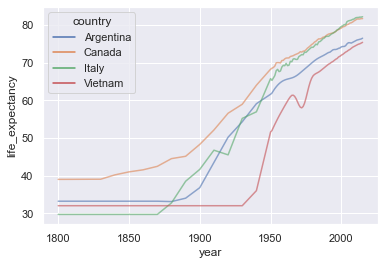

In [20]:
linePlt = sns.lineplot(x = 'year', y = 'life_expectancy', hue = 'country', data = sub_FPL, alpha = 0.6)

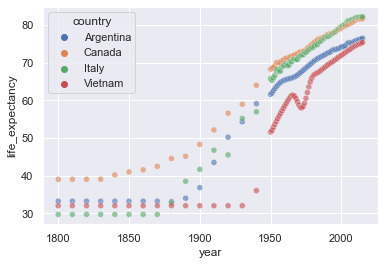

In [21]:
scatPlt = sns.scatterplot(x = 'year', y = 'life_expectancy', hue = 'country', data = sub_FPL, alpha = 0.6)

In [22]:
sub_FPL_from1960 = sub_FPL[sub_FPL['year'] >= 1960]
#sub_FPL_from1960

In [23]:
xmin = sub_FPL_from1960['fertility'].min()
xmax = sub_FPL_from1960['fertility'].max()
ymin = sub_FPL_from1960['life_expectancy'].min()
ymax = sub_FPL_from1960['life_expectancy'].max()

In [24]:
s = sub_FPL_from1960['population']

In [25]:
sns.set_palette("bright")

In [26]:
for year in range(1960, 2016):
    plt.figure()
    sub = sub_FPL[sub_FPL['year'] == year]
    life_exp = sns.scatterplot(x='fertility', y='life_expectancy', hue='country', data=sub, alpha=0.6, size = s)
    plt.axis((xmin - 2, xmax + 4, ymin - 10, ymax + 10))
    plt.legend(bbox_to_anchor=(1, 1))
    plt.title(year)
    fig = life_exp.get_figure()
    fig.savefig('./p_images/lifeFert' +str(year)+ '.png')
    plt.close()

In [27]:
import os
import imageio

png_dir = './p_images/'
images = []
for file_name in sorted(os.listdir(png_dir)):
#for file_name in os.listdir(png_dir):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
            
imageio.mimsave('./p_movies/lifeFert_movie.gif', images, fps = 2)